In [17]:
import pandas as pd

df = pd.read_csv("C:\\MAIN\\NYCDSA\\Web_Scraping_Project\\Reuters\\2020_01_23_reuters_news_900_articles.csv")

In [18]:
########################################################################################
# PART 1 - Preliminary exploration
########################################################################################

# How many observations?  There are 4 columns: body (text), classification, timestamp, and title
print("Dimensions of our dataframe: ",df.shape)
print("Our 4 columns are: ",df.columns)

Dimensions of our dataframe:  (910, 4)
Our 4 columns are:  Index(['body', 'classification', 'timestamp', 'title'], dtype='object')


In [97]:
# How many unique classifications are there and what are they?
print("There are a total of",df.classification.nunique(),"types of articles, which are\n",df.classification.unique())

There are a total of 11 types of articles, which are
 ['Technology News' 'Business News' 'Big Story 15' 'World News' 'Japan'
 'Environment' 'Foreign Exchange Analysis' 'Sustainable Business'
 'Fintech' 'Wealth' 'U.S.']


In [19]:
# Observe the first 5 elements
df.head()

,body,classification,timestamp,title
0,VANCOUVER (Reuters) - The first phase of battl...,Technology News,1/23/2020 12:52,U.S. extradition battle over Huawei's Meng end...
1,PARIS (Reuters) - French prosecutors investiga...,Business News,1/23/2020 18:42,French investigators to move ahead with Ghosn ...
2,BRUSSELS (Reuters) - iPhone maker Apple on Thu...,Technology News,1/23/2020 16:05,"Apple pushes back against EU common charger, w..."
3,"(Reuters) - Waymo, the self-driving unit of Al...",Technology News,1/23/2020 13:57,"Waymo to test autonomous trucks, vans in Texas..."
4,LONDON (Reuters) - Britain wants a trade deal ...,Technology News,1/23/2020 8:04,Britain to United States: We want a trade deal...


In [20]:
# Looks like our timestamps are strings
print("First timestamp",df.timestamp[0],"is type",type(df.timestamp[0]))

#Convert the timestamps from string type to datetime type
df.timestamp = pd.to_datetime(df.timestamp, format = '%m/%d/%Y %H:%M')
print("\nAfter conversion")
print("First timestamp",df.timestamp[0], "is type",type(df.timestamp[0]))

First timestamp 1/23/2020 12:52 is type <class 'str'>

After conversion
First timestamp 2020-01-23 12:52:00 is type <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
# Sort by timestamp first, to get these by chronological order
df = df.sort_values(by = "timestamp", ascending=False)

In [22]:
# Verify that the sorting by timestamp process worked
df.head(n=5)

,body,classification,timestamp,title
158,"(Reuters) - Chipmaker Broadcom Inc (,) said on...",Technology News,2020-01-23 21:42:00,Broadcom to supply wireless components to Apple
155,BOSTON (Reuters) - Insys Therapeutics founder ...,Business News,2020-01-23 21:14:00,Insys founder Kapoor sentenced to 66 months in...
161,"(Reuters) - Intel Corp (,) on Thursday cemente...",Business News,2020-01-23 21:08:00,Intel sees 2020 revenue above estimates as chi...
145,GEORGETOWN (Reuters) - Guyana's government nex...,Business News,2020-01-23 19:46:00,Exclusive: Guyana opening search for oil firm ...
1,PARIS (Reuters) - French prosecutors investiga...,Business News,2020-01-23 18:42:00,French investigators to move ahead with Ghosn ...


In [23]:
# Verify that the sorting by timestamp process worked
df.tail(n=5)

,body,classification,timestamp,title
806,HOUSTON (Reuters) - Oil prices reached the hig...,Business News,2019-12-19 02:34:00,"Oil reaches three-month highs, supported by lo..."
811,NEW YORK (Reuters) - Global equity markets ext...,Business News,2019-12-19 00:53:00,Stocks rally anew; euro bonds rise on Swedish ...
804,NEW YORK (Reuters) - The dollar was stalled on...,Business News,2019-12-19 00:48:00,"Markets sleepy, dollar on hold ahead of U.S. G..."
802,LUXEMBOURG (Reuters) - Agreements that let Fac...,Technology News,2019-12-18 23:17:00,Facebook EU user data transfer contracts are l...
807,"WASHINGTON (Reuters) - BMW AG (,) and Daimler ...",Business News,2019-12-18 19:56:00,"Daimler, BMW exiting North American car-sharin..."


In [24]:
# Look at the body text of the first article here
article = df.iloc[0,0]
article

'(Reuters) - Chipmaker Broadcom Inc (,) said on Thursday it has entered into two multi-year agreements with Apple Inc (,) for the supply of wireless components used in its products. ,The agreements, "2020 SOWs", are in addition to the existing ones for supplying radio frequency components and modules to the iPhone maker and together could generate as much as $15 billion in revenue for Broadcom. ,Shares of the chipmaker rose 2% in extended trading.             '

In [25]:
########################################################################################
# Part 2- Getting word count
########################################################################################

import string

# Input: a string (article)
# Output: a string (article) without punctuation
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Input: a string (article)
# Output: a list of strings (a list of all the words in the article, minus stop words)
def remove_stop_words(article):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["also", "could", "inc", "said", "reuters", "since", "told", "would"])

    article = article.split()
    word_list_without_stop_words = []
    for word in article:
        if word not in stop_words:
            word_list_without_stop_words.append(word)
    return word_list_without_stop_words

In [27]:
import operator

# Input: text of words.  Output: dictionary of the unique words and how often they appeared,
# with most frequent words listed first
def count_word_frequency(list_of_words):
    word_dict = {}
    for word in list_of_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [28]:
def order_dict_by_value(input_dict, descending_or_not):
    return dict(sorted(input_dict.items(), key=operator.itemgetter(1),reverse=descending_or_not))

In [29]:
# Concatenate all articles together - very long string!
all_articles = df.body.str.cat(sep=' ')

all_articles = all_articles.lower()
all_articles_no_punctuation = remove_punctuation(all_articles)
list_of_all_words = remove_stop_words(all_articles_no_punctuation)
count_of_all_words = count_word_frequency(list_of_all_words)
count_of_all_words = order_dict_by_value(count_of_all_words, True)

In [110]:
print("Number of unique words: ",len(count_of_all_words.keys()))
print("")
print("Complete dictionary here:",count_of_all_words)

Number of unique words:  20351

Complete dictionary here: {'us': 1995, 'year': 1210, 'new': 1103, 'billion': 1052, 'last': 937, 'trade': 928, 'market': 837, 'china': 820, 'company': 787, 'million': 757, 'deal': 674, '2019': 593, 'united': 584, 'two': 569, 'states': 563, 'years': 557, 'data': 539, 'oil': 532, 'growth': 508, 'sales': 505, 'companies': 494, 'bank': 477, 'global': 475, 'first': 474, 'chinese': 465, 'one': 461, 'ghosn': 461, 'business': 457, 'month': 446, 'according': 444, 'chief': 432, '2020': 423, 'boeing': 423, 'including': 399, '2018': 399, 'week': 397, 'max': 378, '1': 378, 'rose': 376, 'investors': 374, 'shares': 371, 'prices': 371, 'president': 363, 'expected': 360, 'financial': 352, 'december': 349, 'time': 345, 'months': 340, 'trump': 336, 'markets': 334, 'wednesday': 327, 'group': 323, 'executive': 321, 'november': 310, 'investment': 307, 'quarter': 300, 'may': 297, '737': 297, 'thursday': 293, 'vehicles': 293, 'fell': 290, 'three': 289, 'demand': 289, 'tuesday': 

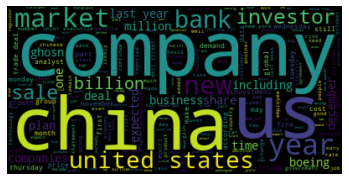

<Figure size 1440x1440 with 0 Axes>

In [38]:
########################################################################################
# Part 3 - Some data visualization
########################################################################################

from wordcloud import WordCloud 

# Creating a word cloud
def create_wordcloud(input_string):
    wordcloud = WordCloud().generate(input_string)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure(figsize=(20,20))
    plt.show()

create_wordcloud(" ".join(list_of_all_words))

In [126]:
# Input: sorted dictionary of most common words and their frequencies, with most frequency words first
# and i represents i-th most common word
# Output: returns a dictionary with the i-most common words in the sorted dictionary sorted_word_count
def find_n_most_common_words(sorted_word_count, i):
    freq_of_nth_word = list(sorted_word_count.values())[i-1]
    most_common_word_count = {}
    for (key, value) in sorted_word_count.items():
        if sorted_word_count[key] > freq_of_nth_word:
            most_common_word_count[key] = value
    return most_common_word_count

most_common_20_words = find_n_most_common_words(count_of_all_words, 20)

print("Most common 20 words and how often they appeared:\n",most_common_20_words)

Most common 20 words and how often they appeared:
 {'us': 1995, 'year': 1210, 'new': 1103, 'billion': 1052, 'last': 937, 'trade': 928, 'market': 837, 'china': 820, 'company': 787, 'million': 757, 'deal': 674, '2019': 593, 'united': 584, 'two': 569, 'states': 563, 'years': 557, 'data': 539, 'oil': 532, 'growth': 508}


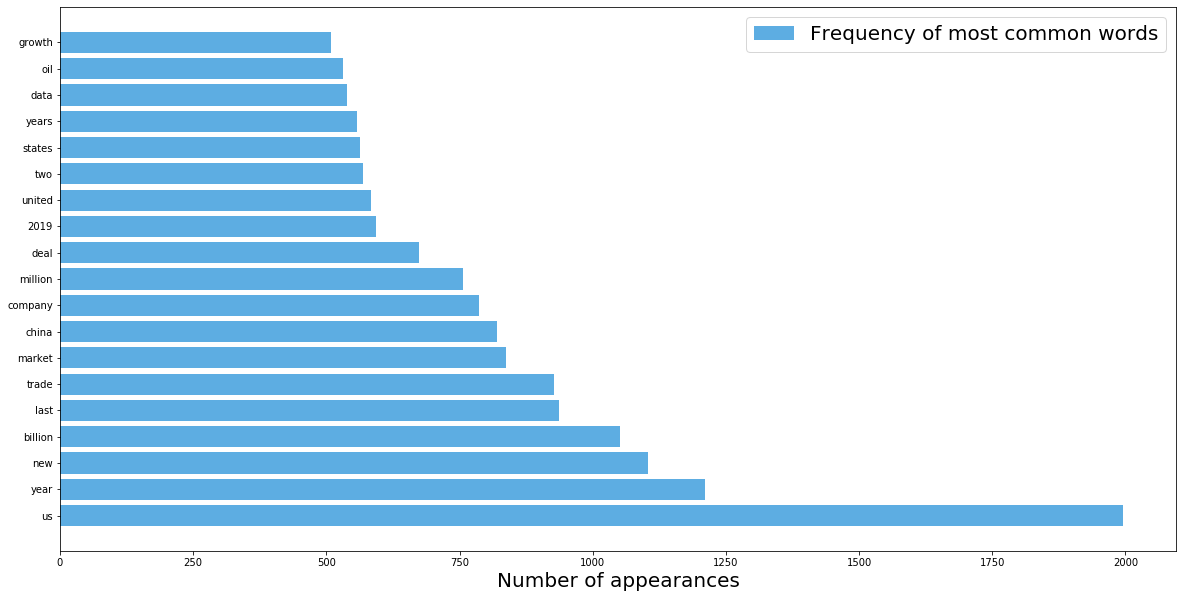

In [127]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20,10))
ax.barh(list(most_common_20_words.keys()), most_common_20_words.values(), color='#5DADE2', label = 'Frequency of most common words')
ax.set_xlabel('Number of appearances', fontsize=20)
ax.legend(fontsize=20)

In [144]:
########################################################################################
# Part 4 - Unsupervised classification
# Now let's try to classify the articles into various categories based on frequency of words in them
########################################################################################

# Use the most common 500 words in articles
n_words = 250
most_common_n_words = find_n_most_common_words(count_of_all_words, n_words)
print("Dictionary:\n",most_common_n_words)


most_common_n_words_words = list(most_common_n_words.keys())
most_common_n_words_counts = list(most_common_n_words.values())
print("\nSize: ",len(most_common_n_words_words),"Keys:\n", most_common_n_words_words)
print("\nValues:\n", most_common_n_words_counts)

# print("")
# print(len(most_common_n_words_counts))

Dictionary:
 {'us': 1995, 'year': 1210, 'new': 1103, 'billion': 1052, 'last': 937, 'trade': 928, 'market': 837, 'china': 820, 'company': 787, 'million': 757, 'deal': 674, '2019': 593, 'united': 584, 'two': 569, 'states': 563, 'years': 557, 'data': 539, 'oil': 532, 'growth': 508, 'sales': 505, 'companies': 494, 'bank': 477, 'global': 475, 'first': 474, 'chinese': 465, 'one': 461, 'ghosn': 461, 'business': 457, 'month': 446, 'according': 444, 'chief': 432, '2020': 423, 'boeing': 423, 'including': 399, '2018': 399, 'week': 397, 'max': 378, '1': 378, 'rose': 376, 'investors': 374, 'shares': 371, 'prices': 371, 'president': 363, 'expected': 360, 'financial': 352, 'december': 349, 'time': 345, 'months': 340, 'trump': 336, 'markets': 334, 'wednesday': 327, 'group': 323, 'executive': 321, 'november': 310, 'investment': 307, 'quarter': 300, 'may': 297, '737': 297, 'thursday': 293, 'vehicles': 293, 'fell': 290, 'three': 289, 'demand': 289, 'tuesday': 287, 'people': 286, 'friday': 286, 'reported'

In [145]:
# Create a matrix that is n row (number of observations = number of articles) x
# m columns (different words), and the elements of the matrix represent how many times
# a word j (1 < j < m) appeared in article i (1 < i < n)
# Then we can run an unsupervised classification algorithm such as k means here:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

import numpy as np

# Inputs: dictionary of 50 most common words, plus the text of all articles
# Outputs: generate this matrix described above
# def create_word_matrix(column_of_articles, most_common_n_words):
    # Iterate going down the column...

# Given a news article body (long string) and list of most common n words from most freq to least
# Return the word vector for this article
def get_article_word_vector(article, most_common_n_words_words):
    article = article.lower()
    article = remove_punctuation(article)
    article = remove_stop_words(article)
    article_word_freq = count_word_frequency(article)
    #print("")
    #print(article_word_freq)
    #print("")

    word_vector = np.zeros(n_words)
    for word, frequency in article_word_freq.items():
        if word in most_common_n_words_words:
            #print("Word:",word)
            #print("Frequency:",frequency)
            position = most_common_n_words_words.index(word)
            word_vector[position] += 1
    #print(word_vector)
    return word_vector

word_matrix = np.array([get_article_word_vector(article, most_common_n_words_words)\
                        for article in df.body])

In [146]:
print("Word matrix:",word_matrix)
print("")
print(word_matrix.shape)

Word matrix: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]]

(910, 250)


In [156]:
from sklearn.cluster import KMeans
n_categories = 3
k_means_model = KMeans(n_clusters=n_categories, random_state=0).fit(word_matrix)
#k_means_model.labels_

In [157]:
# Now, for each class / label in the k-means,
    # Print out the most common words in that class

for category in range(n_categories):
    indices_of_articles_in_category = (k_means_model.labels_ == category)
    
    all_articles = df.title[indices_of_articles_in_category].str.cat(sep=' ')
    all_articles = all_articles.lower()
    all_articles_no_punctuation = remove_punctuation(all_articles)
    list_of_all_words = remove_stop_words(all_articles_no_punctuation)
    count_of_all_words = count_word_frequency(list_of_all_words)
    count_of_all_words = order_dict_by_value(count_of_all_words, True)
    n_words = 20
    most_common_n_words = find_n_most_common_words(count_of_all_words, n_words)
    
    print("")
    print("#"*100)
    print("For category",category,"common words were:\n",most_common_n_words)
    print("\nSome sample news headlines from this category include:")
    print(df.title[indices_of_articles_in_category].head(n=30))


####################################################################################################
For category 0 common words were:
 {'us': 61, 'trade': 44, 'oil': 33, 'deal': 22, 'china': 21, 'stocks': 19, 'dollar': 15, 'record': 12, 'wall': 12, 'street': 12, 'markets': 11, 'market': 10, 'gains': 10, 'global': 10, 'highs': 10}

Some sample news headlines from this category include:
135    U.S. weekly jobless claims rise modestly; labo...
139    Union Pacific shares rise as CEO says U.S.-Chi...
157    S&P 500 gains, Nasdaq hits new high as investo...
124      Mexico goes ghost as its oil hedge bill spirals
148    Oil falls 2% as specter of China virus threate...
156     Coronavirus fears weigh on global equity markets
147    Dollar up vs euro as ECB holds rates steady, l...
113    U.S. economy to coast, no big boost expected f...
142    ECB's Lagarde launches policy overhaul that wi...
112    After China trade deal, Europe and UK next on ...
81     U.S. home sales surge to near two